In [ ]:
pip install deepface

In [2]:
import matplotlib.pyplot as plt

Add more emotions, see Face emotions code

In [3]:
import io, os

from google.cloud import videointelligence as videointelligence
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="C:/Users/felip/Video/video.json"


def detect_faces(gcs_uri="gs://redoga/Coles - Chicken Drumsticks and Salad 15 TVC.mp4"):
    
    """Detects faces in a video."""

    client = videointelligence.VideoIntelligenceServiceClient()

    # Configure the request
    config = videointelligence.FaceDetectionConfig(
        include_bounding_boxes=True, include_attributes=True
    )
    context = videointelligence.VideoContext(face_detection_config=config)

    # Start the asynchronous request
    operation = client.annotate_video(
        request={
            "features": [videointelligence.Feature.FACE_DETECTION],
            "input_uri": gcs_uri,
            "video_context": context,
        }
    )

    print("\nProcessing video for face detection annotations.")
    result = operation.result(timeout=300)

    print("\nFinished processing.\n")

    # Retrieve the first result, because a single video was processed.
    annotation_result = result.annotation_results[0]

    for annotation in annotation_result.face_detection_annotations:
        print("Face detected:")
        for track in annotation.tracks:
            print(
                "Segment: {}s to {}s".format(
                    track.segment.start_time_offset.seconds
                    + track.segment.start_time_offset.microseconds / 1e6,
                    track.segment.end_time_offset.seconds
                    + track.segment.end_time_offset.microseconds / 1e6,
                )
            )

            # Each segment includes timestamped faces that include
            # characteristics of the face detected.
            # Grab the first timestamped face
            timestamped_object = track.timestamped_objects[0]
            box = timestamped_object.normalized_bounding_box
            print("Bounding box:")
            print("\tleft  : {}".format(box.left))
            print("\ttop   : {}".format(box.top))
            print("\tright : {}".format(box.right))
            print("\tbottom: {}".format(box.bottom))

            # Attributes include glasses, headwear, smiling, direction of gaze
            print("Attributes:")
            for attribute in timestamped_object.attributes:
                print(
                    "\t{}:{} {}".format(
                        attribute.name, attribute.value, attribute.confidence
                    )
                )

In [4]:
##results
detect_faces()


Processing video for face detection annotations.

Finished processing.

Face detected:
Segment: 12.36s to 13.32s
Bounding box:
	left  : 0.7656000256538391
	top   : 0.2583000063896179
	right : 0.9061999917030334
	bottom: 0.5490999817848206
Attributes:
	glasses: 0.015398826450109482
	mouth_open: 0.3887190520763397
	smiling: 0.0673668161034584
	eyes_visible: 0.018706273287534714
	looking_at_camera: 0.0013148135039955378
	headwear: 0.003365893382579088
Face detected:
Segment: 12.36s to 13.32s
Bounding box:
	left  : 0.24009999632835388
	top   : 0.18240000307559967
	right : 0.36719998717308044
	bottom: 0.44440001249313354
Attributes:
	glasses: 0.011803577654063702
	mouth_open: 0.05222175270318985
	smiling: 0.9561442732810974
	eyes_visible: 0.5599380731582642
	looking_at_camera: 0.04087596386671066
	headwear: 0.04902491718530655
Face detected:
Segment: 4.92s to 5.52s
Bounding box:
	left  : 0.4140999913215637
	top   : 0.0
	right : 0.6978999972343445
	bottom: 0.5407000184059143
Attributes:
	gl

##### Second Example

In [17]:
import io, os

from google.cloud import videointelligence as videointelligence
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="C:/Users/felip/Video/video.json"

# We define the detect_faces function
def detect_faces1(gcs_uri="gs://redoga/Hungry Jack's Coffee 15s TVC.mp4"):
    
    """Detects faces in a video."""

    client = videointelligence.VideoIntelligenceServiceClient()

    # Configure the request
    config = videointelligence.FaceDetectionConfig(
        include_bounding_boxes=True, include_attributes=True
    )
    context = videointelligence.VideoContext(face_detection_config=config)

    # Start the asynchronous request
    operation = client.annotate_video(
        request={
            "features": [videointelligence.Feature.FACE_DETECTION],
            "input_uri": gcs_uri,
            "video_context": context,
        }
    )

    print("\nProcessing video for face detection annotations.")
    result = operation.result(timeout=300)

    print("\nFinished processing.\n")

    # Retrieve the first result, because a single video was processed.
    annotation_result = result.annotation_results[0]

    for annotation in annotation_result.face_detection_annotations:
        print("Face detected:")
        for track in annotation.tracks:
            print(
                "Segment: {}s to {}s".format(
                    track.segment.start_time_offset.seconds
                    + track.segment.start_time_offset.microseconds / 1e6,
                    track.segment.end_time_offset.seconds
                    + track.segment.end_time_offset.microseconds / 1e6,
                )
            )

            # Each segment includes timestamped faces that include
            # characteristics of the face detected.
            # Grab the first timestamped face
            timestamped_object = track.timestamped_objects[0]
            box = timestamped_object.normalized_bounding_box
            print("Bounding box:")
            print("\tleft  : {}".format(box.left))
            print("\ttop   : {}".format(box.top))
            print("\tright : {}".format(box.right))
            print("\tbottom: {}".format(box.bottom))

            # Attributes include glasses, headwear, smiling, direction of gaze
            print("Attributes:")
            for attribute in timestamped_object.attributes:
                print(
                    "\t{}:{} {}".format(
                        attribute.name, attribute.value, attribute.confidence
                    )
                )

In [18]:
detect_faces1()


Processing video for face detection annotations.

Finished processing.

Face detected:
Segment: 9.36s to 11.88s
Bounding box:
	left  : 0.6891000270843506
	top   : 0.19349999725818634
	right : 0.8525999784469604
	bottom: 0.5306000113487244
Attributes:
	glasses: 0.1630522608757019
	headwear: 0.07386670261621475
	eyes_visible: 0.5459266901016235
	mouth_open: 0.026397187262773514
	looking_at_camera: 0.05309304594993591
	smiling: 0.17870453000068665
Face detected:
Segment: 9.36s to 11.88s
Bounding box:
	left  : 0.13539999723434448
	top   : 0.11299999803304672
	right : 0.3156000077724457
	bottom: 0.48330000042915344
Attributes:
	glasses: 0.018971005454659462
	headwear: 0.005488894414156675
	eyes_visible: 0.3966198265552521
	mouth_open: 0.017202522605657578
	looking_at_camera: 0.02030651830136776
	smiling: 0.00011147722398163751
Face detected:
Segment: 3.6s to 4.92s
Bounding box:
	left  : 0.2572999894618988
	top   : 0.05559999868273735
	right : 0.5390999913215637
	bottom: 0.6388999819755554


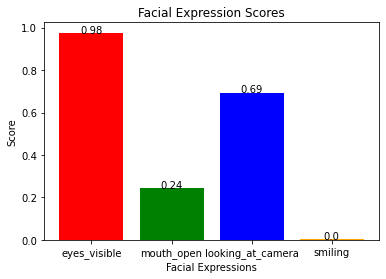

In [1]:
import matplotlib.pyplot as plt

# Define the values to plot
values = [0.9753464460372925, 0.24261705577373505, 0.6937441229820251, 0.0038789708632975817]
labels = ['eyes_visible', 'mouth_open', 'looking_at_camera', 'smiling']

# Define the colors for the bars
colors = ['red', 'green', 'blue', 'orange']

# Create a bar chart with the specified colors
plt.bar(labels, values, color=colors)

for i, v in enumerate(values):
    plt.text(i, v, str(round(v, 2)), ha='center')

# Set the title and axis labels
plt.title('Facial Expression Scores')
plt.xlabel('Facial Expressions')
plt.ylabel('Score')

# Show the plot
plt.show()

Emotions + ethinicity

In [7]:
from deepface import DeepFace ### Helps library that helps with facial recognition

In [12]:
face_analysis = DeepFace.analyze(img_path = "C:/Users/felip/OneDrive\Pictures/33294D_030_Bucheli.jpg") ### Code that helps analyze images, this shows emotions + ethnicity

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]   


In [14]:
print(face_analysis)

[{'emotion': {'angry': 3.234269385643529e-06, 'disgust': 6.385257817109649e-14, 'fear': 90.15002846717834, 'happy': 0.44224895536899567, 'sad': 6.763043254613876, 'surprise': 0.008190189691958949, 'neutral': 2.636488154530525}, 'dominant_emotion': 'fear', 'region': {'x': 701, 'y': 263, 'w': 663, 'h': 663}, 'age': 33, 'gender': {'Woman': 1.8486527726054192, 'Man': 98.1513500213623}, 'dominant_gender': 'Man', 'race': {'asian': 14.351983368396759, 'indian': 13.334597647190094, 'black': 2.7461783960461617, 'white': 19.769901037216187, 'middle eastern': 24.03419017791748, 'latino hispanic': 25.763145089149475}, 'dominant_race': 'latino hispanic'}]


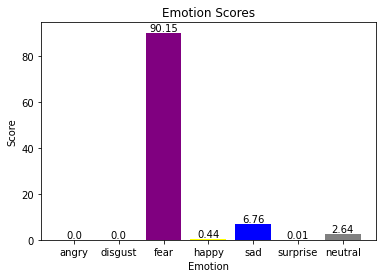

In [15]:
# Use the emotion scores above to see the results
emotion_scores = {'angry': 3.234269385643529e-06, 'disgust': 6.385257817109649e-14, 'fear': 90.15002846717834, 'happy': 0.44224895536899567, 'sad': 6.763043254613876, 'surprise': 0.008190189691958949, 'neutral': 2.636488154530525}

# Define the colors for each emotion to help with the data visualization
colors = ['red', 'green', 'purple', 'yellow', 'blue', 'pink', 'gray']

# Create a bar chart with the specified colors
plt.bar(emotion_scores.keys(), emotion_scores.values(), color=colors)

# Add the respective value to the top of each bar
for i, v in enumerate(emotion_scores.values()):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Define the title and axis labels
plt.title('Emotion Scores')
plt.xlabel('Emotion')
plt.ylabel('Score')

# Show the plot
plt.show()

Let's try an easier way where it only finds emotions

In [15]:
# FER is another library that helps with facial recognition, this is better than Deepface because it provides emotions only
from fer import FER
import cv2

In [16]:
# We test with an image to see the results
emotion_detector = FER(mtcnn=True)
test_img = cv2.imread("C:/Users/felip/OneDrive\Pictures/33294D_030_Bucheli.jpg")
analysis = emotion_detector.detect_emotions(test_img)
print(analysis) 

[{'box': [781, 273, 503, 656], 'emotions': {'angry': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happy': 0.98, 'sad': 0.0, 'surprise': 0.0, 'neutral': 0.02}}]


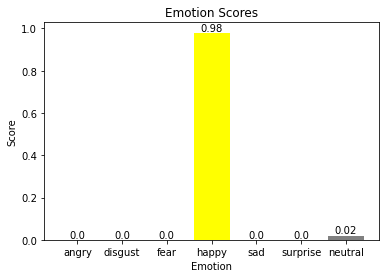

In [17]:
#Same process as the previous graph, define the emotion scores
emotions = {'angry': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happy': 0.98, 'sad': 0.0, 'surprise': 0.0, 'neutral': 0.02}

# Define the colors for each emotion for a better data visualization
colors = ['red', 'green', 'purple', 'yellow', 'blue', 'pink', 'gray']

# Create a bar chart with the specified colors
plt.bar(emotions.keys(), emotions.values(), color=colors)

# Add the value to the top of each bar
for i, v in enumerate(emotions.values()):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Define title and axis labels
plt.title('Emotion Scores')
plt.xlabel('Emotion')
plt.ylabel('Score')

# Show the plot
plt.show()

Second try to see if we can analyze a video using graphs

In [44]:
from fer import Video
import os
import sys
import pandas as pd

INFO:fer:25.00 fps, 375 frames, 15.00 seconds
INFO:fer:Making directories at output
100%|██████████| 375/375 [05:56<00:00,  1.05frames/s]
INFO:fer:Completed analysis: saved to output\Klarna - Get them Boots 15 TVC_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 13%
INFO:fer:Compressing: 26%
INFO:fer:Compressing: 40%
INFO:fer:Compressing: 53%
INFO:fer:Compressing: 66%
INFO:fer:Compressing: 80%
INFO:fer:Compressing: 93%
INFO:fer:Zip has finished


,Human Emotions,Emotion Value from the Video
0,Angry,28.13
1,Disgust,1.25
2,Fear,12.92
3,Happy,31.18
4,Sad,38.37
5,Surprise,2.21
6,Neutral,22.82


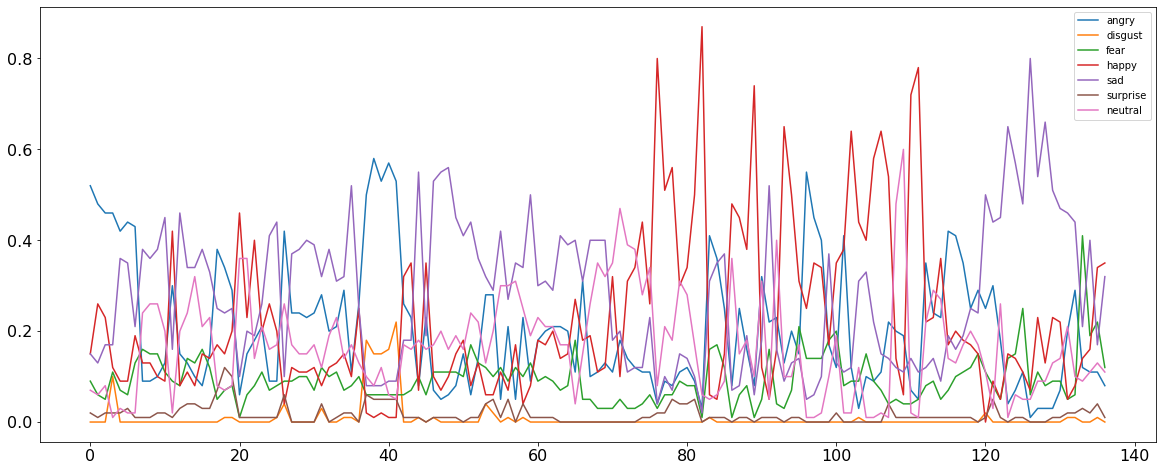

In [45]:
# We add the location of the video file that has to be processed, we are only using the video from the PC not from Google Storage yet
location_videofile = "C:/SQL2019/Video/Klarna - Get them Boots 15 TVC.mp4"

# Build the Face detection detector using OpenCV's Haar Cascade classifier. To use the more accurate MTCNN network, we set the mtcnn parameter to true 
face_detector = FER(mtcnn=True)

# Input the video for processing
input_video = Video(location_videofile)

# The Analyze() function will run analysis on every frame of the input video. 
# It will create a rectangular box around every image and show the emotion values next to that.
# Finally, the method will publish a new video that will have a box around the face of the human with live emotion values.
processing_data = input_video.analyze(face_detector, display=False)

# We will now convert the analysed information into a dataframe.
# This will help us perform analysis over it later
vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)

# Plotting the emotions vs. time in the video
pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()

# We will now work on the dataframe to extract which emotion was prominent in the video
angry = sum(vid_df.angry)
disgust = sum(vid_df.disgust)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]

score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values
score_comparisons

##### The most prominent emotion in the video was sad. After watching the video, even though it was not intended, the actress shows a sad face, that's why the results have multiple emotions.

##### Let's try a second example 

INFO:fer:25.00 fps, 749 frames, 29.96 seconds
INFO:fer:Making directories at output
100%|██████████| 749/749 [14:05<00:00,  1.13s/frames]
INFO:fer:Completed analysis: saved to output\Bupa - Life Happens 30 TVC_output.mp4
INFO:fer:Starting to Zip
INFO:fer:Compressing: 6%
INFO:fer:Compressing: 13%
INFO:fer:Compressing: 20%
INFO:fer:Compressing: 26%
INFO:fer:Compressing: 33%
INFO:fer:Compressing: 40%
INFO:fer:Compressing: 46%
INFO:fer:Compressing: 53%
INFO:fer:Compressing: 60%
INFO:fer:Compressing: 66%
INFO:fer:Compressing: 73%
INFO:fer:Compressing: 80%
INFO:fer:Compressing: 86%
INFO:fer:Compressing: 93%
INFO:fer:Zip has finished


,Human Emotions,Emotion Value from the Video
0,Angry,29.47
1,Disgust,0.90
2,Fear,28.84
3,Happy,253.96
4,Sad,80.44
5,Surprise,46.71
6,Neutral,55.92


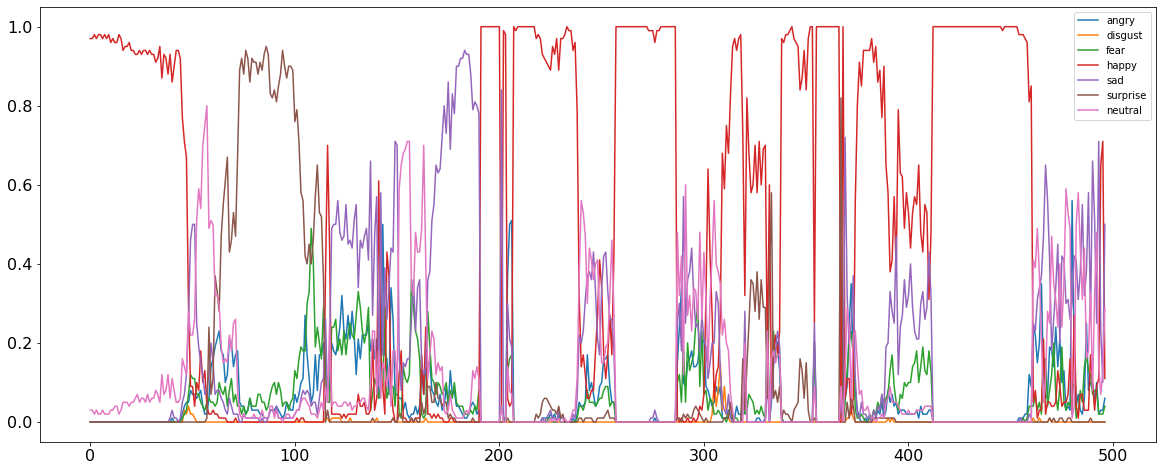

In [10]:
## We do the same process as before
location_videofile = "C:/SQL2019/Video/Bupa - Life Happens 30 TVC.mp4"

# Build the Face detection detector
face_detector = FER(mtcnn=True)
# Input the video for processing
input_video = Video(location_videofile)

# Use the Analyze() function for analysis during the video for each frame
processing_data = input_video.analyze(face_detector, display=False)

# Convert analysed information into a dataframe.

vid_df = input_video.to_pandas(processing_data)
vid_df = input_video.get_first_face(vid_df)
vid_df = input_video.get_emotions(vid_df)

# Plotting the emotions vs. time in the video
pltfig = vid_df.plot(figsize=(20, 8), fontsize=16).get_figure()

# We will now work on the dataframe to extract the emotions, and see which one was the most prominent in the video
angry = sum(vid_df.angry)
disgust = sum(vid_df.disgust)
fear = sum(vid_df.fear)
happy = sum(vid_df.happy)
sad = sum(vid_df.sad)
surprise = sum(vid_df.surprise)
neutral = sum(vid_df.neutral)

emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
emotions_values = [angry, disgust, fear, happy, sad, surprise, neutral]

score_comparisons = pd.DataFrame(emotions, columns = ['Human Emotions'])
score_comparisons['Emotion Value from the Video'] = emotions_values
score_comparisons

##### We can see how the most prominent emotions is Happy, and after watching the video we can verify the results.